**ISTRUZIONI**
-----

---
Leggere attentamente questa sezione per un corretto funzionamento della demo.


1.   Recarsi nella sezione "Condivisi con me" di Google Drive
2.   Tasto destro su "FIA_DEMO_"
3.   Selezionare "Aggiungi scorciatoia Drive"
4.   Spostarsi su "Il mio Drive" e selezionare "AGGIUNGI SCORCIATOIA"

La cartella verrà visualizzata da questo momento all'interno della cartella "Il mio Drive". </br>
(PS: Fondamentale per l'esecuzione della demo)

Una volta configurata la cartella condivisa sul Drive Gmail in questa maniera, sarà necessario effettuare il mount del drive per accedere ai file su Drive da Google Collab. </br>

Se non ancora effettuato il mount del Drive la prima cella di codice contiene il codice per effettuarlo.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
# load finalmodel
print("Loading. . .")
loaded_model = keras.models.load_model("/content/drive/MyDrive/FIA_DEMO_/finalModel")
print("Loaded. . .")

Loading. . .
Loaded. . .


Insert a file to detect between: 
 crosswalk_1 
 crosswalk_2 
 limit_1 
 limit_2 
 stop_1 
 stop_2 
 trafficlight_1 
 trafficlight_2
trafficlight_1


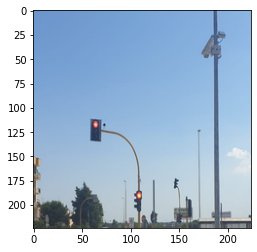

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image,ImageTk
import numpy as np
# Load images
path = "/content/drive/MyDrive/FIA_DEMO_/toPredict/predict_"

print("Insert a file to detect between: \n crosswalk_1 \n crosswalk_2 \n limit_1 "+
 "\n limit_2 \n stop_1 \n stop_2 \n trafficlight_1 \n trafficlight_2")
inputX = input()
path = path + inputX +".png"

immagine = Image.open(path).convert("RGB")

# Image formatting
img=immagine.resize((224,224),Image.ANTIALIAS)
img=np.reshape(img,[224,224,3])

plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Predict
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

prediction = loaded_model.predict(img_preprocessed)
print(prediction)

# Generate arg maxes for predictions
classes = np.argmax(prediction, axis = 1)
print("trafficlight(0), speedlimit(1), crosswalk(2), stop(3)")
print(classes)

[[0. 0. 0. 1.]]
trafficlight(0), speedlimit(1), crosswalk(2), stop(3)
[3]
